In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

In [2]:
path_to_csv1 = "../data/raw/df_final_demo.csv"
df_final_demo = pd.read_csv(path_to_csv1)

path_to_csv2 = "../data/raw/df_final_experiment_clients.csv"
df_final_experiment_clients = pd.read_csv(path_to_csv2)

path_to_csv_3 = "../data/raw/df_final_web_data_pt_1.csv"
df_final_web_data_pt_1 = pd.read_csv(path_to_csv_3)

path_to_csv4 = "../data/raw/df_final_web_data_pt_2.csv"
df_final_web_data_pt_2 = pd.read_csv(path_to_csv4)

In [3]:
df_final_web_data = pd.concat([df_final_web_data_pt_1, df_final_web_data_pt_2], ignore_index=True)

In [4]:
print("Client Profiles:")
display(df_final_demo.head())
print("\nDigital Footprints:")
display(df_final_web_data.head())
print("\nExperiment Roster:")
display(df_final_experiment_clients.head())

Client Profiles:


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0



Digital Footprints:


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04



Experiment Roster:


,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [5]:
df_final_demo.dropna(inplace=True)

In [6]:
df_final_experiment_clients.fillna(value='Undefined', inplace = True)

In [7]:
df_final_demo['gendr'].replace('X', 'U', inplace=True)

/tmp/ipykernel_10601/3529028514.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final_demo['gendr'].replace('X', 'U', inplace=True)


In [8]:
print("\nSummary Statistics for Client Profiles:")
display(df_final_demo.describe())


Summary Statistics for Client Profiles:


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.059400e+04,70594.000000,70594.000000,70594.000000,70594.000000,7.059400e+04,70594.000000,70594.000000
mean,5.005026e+06,12.053007,150.659999,46.442240,2.255532,1.474467e+05,3.382469,5.566720
std,2.877289e+06,6.871850,82.090264,15.591273,0.535000,3.015106e+05,2.236595,2.353296
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519543e+06,6.000000,82.000000,32.500000,2.000000,3.734660e+04,1.000000,4.000000
50%,5.016974e+06,11.000000,136.000000,47.000000,2.000000,6.333459e+04,3.000000,5.000000
75%,7.483074e+06,16.000000,192.000000,59.000000,2.000000,1.375461e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


In [9]:
print("\nUnique Values in Client Profiles:")
print(df_final_demo.nunique())


Unique Values in Client Profiles:
client_id           70594
clnt_tenure_yr         54
clnt_tenure_mnth      482
clnt_age              165
gendr                   3
num_accts               8
bal                 70332
calls_6_mnth            8
logons_6_mnth           9
dtype: int64


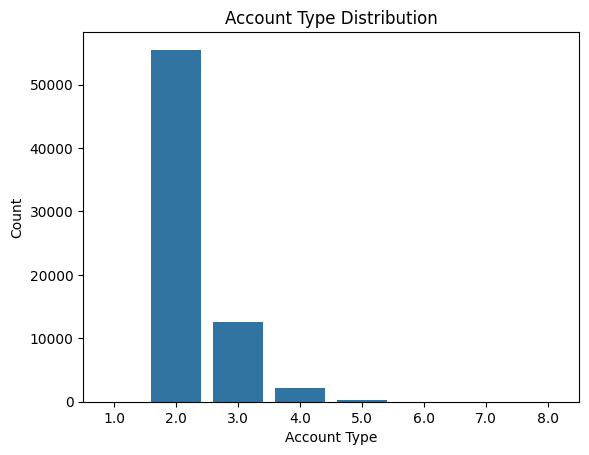

In [10]:
# Visualize account type distribution
sns.countplot(x='num_accts', data=df_final_demo)
plt.title('Account Type Distribution')
plt.xlabel('Account Type')
plt.ylabel('Count')
plt.show()

In [11]:
primary_clients_info = df_final_experiment_clients.merge(df_final_demo, on='client_id', how='inner')

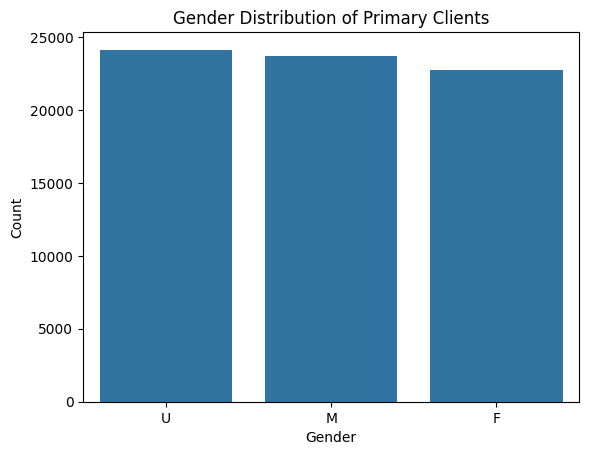

In [12]:
sns.countplot(x='gendr', data=primary_clients_info)
plt.title('Gender Distribution of Primary Clients')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

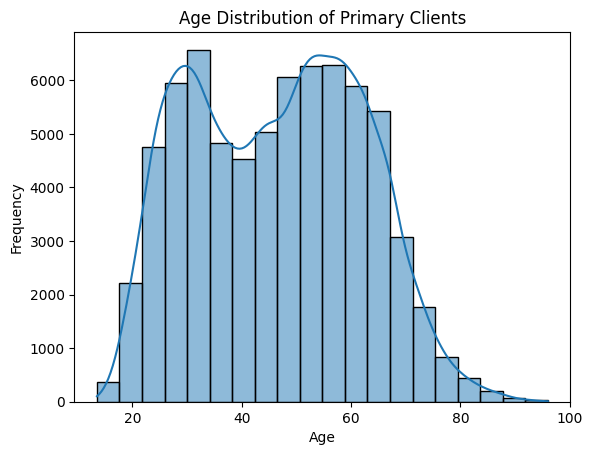

In [13]:
sns.histplot(primary_clients_info['clnt_age'], bins=20, kde=True)
plt.title('Age Distribution of Primary Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

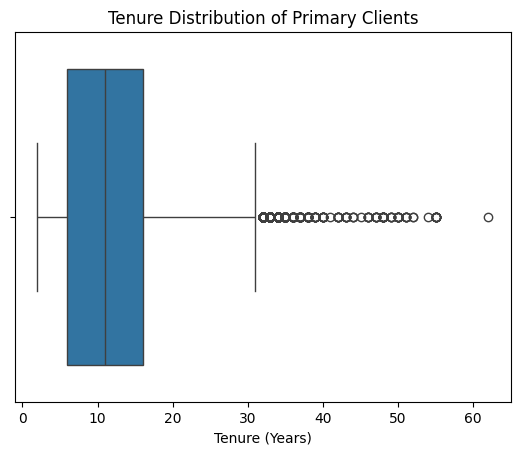

In [14]:
sns.boxplot(x='clnt_tenure_yr', data=primary_clients_info)
plt.title('Tenure Distribution of Primary Clients')
plt.xlabel('Tenure (Years)')
plt.show() 

In [15]:
mean_age = primary_clients_info['clnt_age'].mean()
print(f"Average Age of Primary Clients: {mean_age:.2f} years")

Average Age of Primary Clients: 46.44 years


In [16]:
mean_tenure = primary_clients_info['clnt_tenure_yr'].mean()
print(f"Average Tenure of Primary Clients: {mean_tenure:.2f} years")

Average Tenure of Primary Clients: 12.05 years


In [17]:
mean_logins = primary_clients_info['logons_6_mnth'].mean()
print(f"Average Logins in the Last 6 Months: {mean_logins:.2f}")

Average Logins in the Last 6 Months: 5.57


In [18]:
df_final_experiment_clients.Variation.value_counts()

Variation
Test         26968
Control      23532
Undefined    20109
Name: count, dtype: int64

In [19]:
display(primary_clients_info)

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
70589,2443347,Undefined,17.0,204.0,52.5,M,3.0,164693.48,7.0,7.0
70590,8788427,Undefined,10.0,121.0,59.5,M,2.0,203149.13,3.0,3.0
70591,266828,Undefined,14.0,172.0,60.5,M,2.0,1135068.68,7.0,7.0
70592,1266421,Undefined,13.0,164.0,33.0,M,3.0,27701.79,2.0,3.0


In [20]:
display(df_final_web_data)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [21]:
display(df_final_experiment_clients)

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,Undefined
70605,8788427,Undefined
70606,266828,Undefined
70607,1266421,Undefined


In [22]:
df_final_experiment_clients.shape

(70609, 2)

In [23]:
test_group = primary_clients_info[primary_clients_info['Variation']=='Test']

In [24]:
control_group = primary_clients_info[primary_clients_info['Variation']=='Control']

In [25]:
undefined_group = primary_clients_info[primary_clients_info['Variation']=='Undefined']

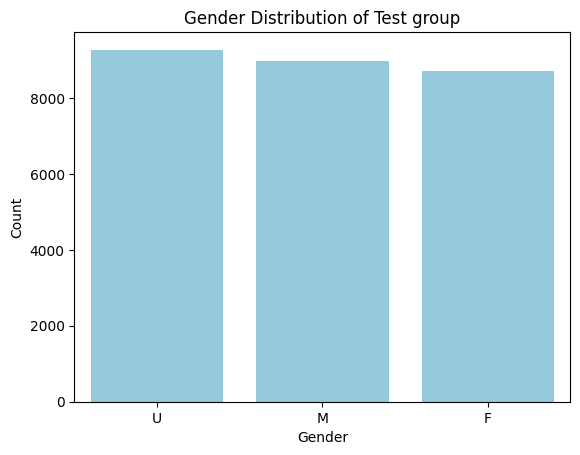

In [26]:
sns.countplot(x='gendr', data=test_group, color='skyblue')
plt.title('Gender Distribution of Test group')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

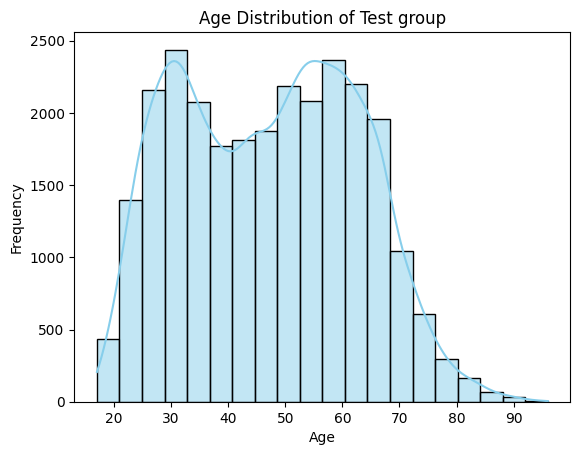

In [27]:
sns.histplot(test_group['clnt_age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Test group')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

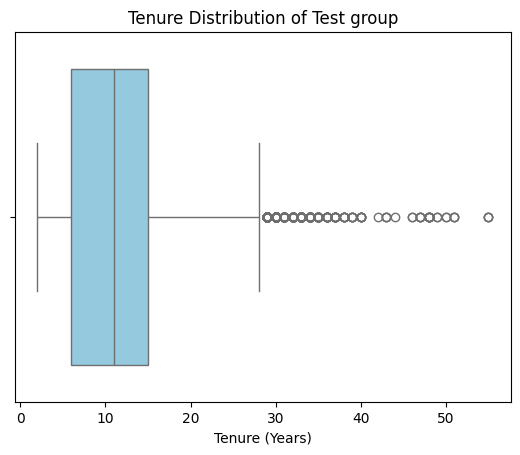

In [28]:
sns.boxplot(x='clnt_tenure_yr', data=test_group, color='skyblue')
plt.title('Tenure Distribution of Test group')
plt.xlabel('Tenure (Years)')
plt.show() 

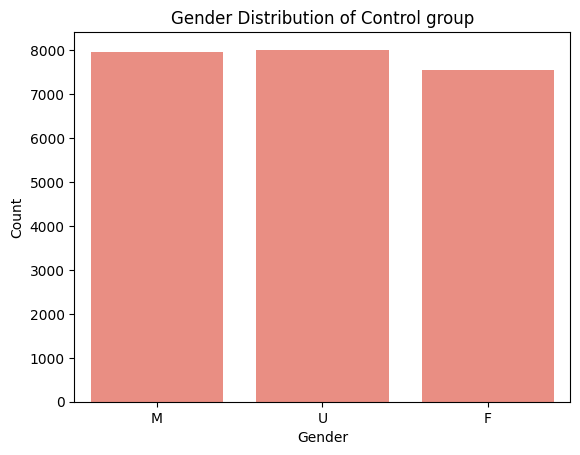

In [29]:
sns.countplot(x='gendr', data=control_group, color='salmon')
plt.title('Gender Distribution of Control group')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

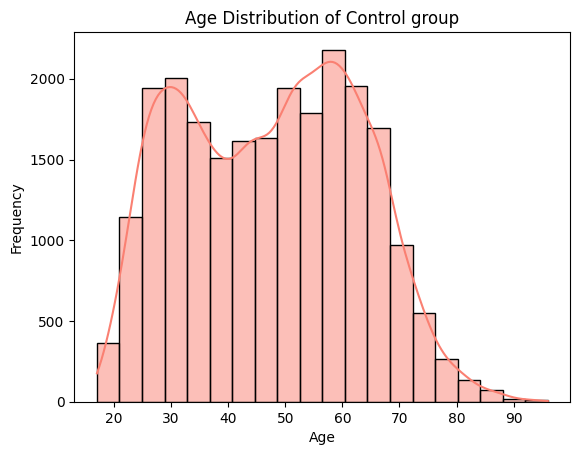

In [30]:
sns.histplot(control_group['clnt_age'], bins=20, kde=True, color='salmon')
plt.title('Age Distribution of Control group')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

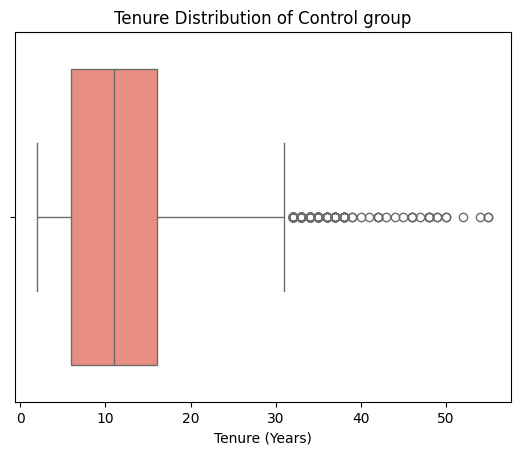

In [31]:
sns.boxplot(x='clnt_tenure_yr', data=control_group, color='salmon')
plt.title('Tenure Distribution of Control group')
plt.xlabel('Tenure (Years)')
plt.show() 

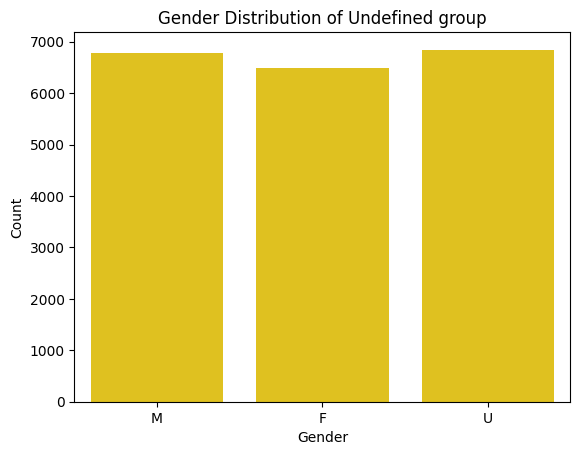

In [32]:
sns.countplot(x='gendr', data=undefined_group, color='gold')
plt.title('Gender Distribution of Undefined group')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

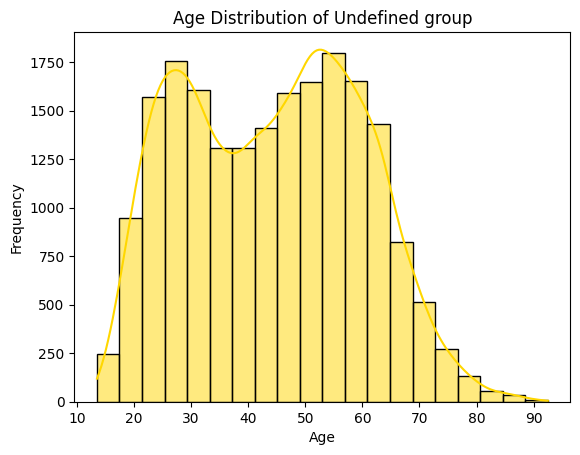

In [33]:
sns.histplot(undefined_group['clnt_age'], bins=20, kde=True, color='gold')
plt.title('Age Distribution of Undefined group')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

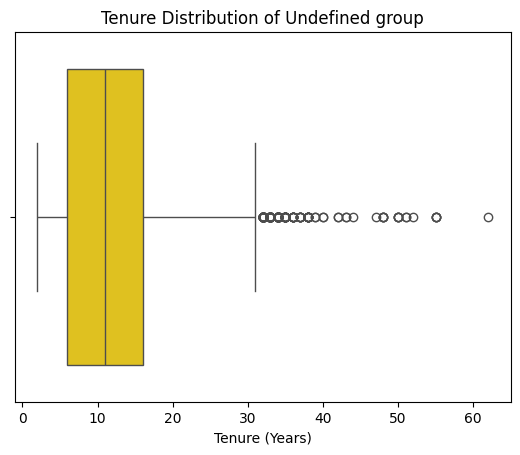

In [34]:
sns.boxplot(x='clnt_tenure_yr', data=undefined_group, color='gold')
plt.title('Tenure Distribution of Undefined group')
plt.xlabel('Tenure (Years)')
plt.show() 

In [35]:
df_final_web_data.client_id.nunique()

120157

In [36]:
primary_clients_info.client_id.nunique()

70594

In [37]:
merged_data = pd.merge(primary_clients_info, df_final_web_data, on='client_id', how='inner')

In [38]:
merged_data.shape

(449704, 14)

In [39]:
merged_data.client_id.nunique()

70594

In [40]:
merged_data.tail(50).sort_values(by='client_id')

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time
449690,266828,Undefined,14.0,172.0,60.5,M,2.0,1135068.68,7.0,7.0,140157234_42535034872,95646321_25965124122_458073,confirm,2017-04-13 10:02:33
449692,266828,Undefined,14.0,172.0,60.5,M,2.0,1135068.68,7.0,7.0,140157234_42535034872,95646321_25965124122_458073,confirm,2017-04-13 10:01:03
449691,266828,Undefined,14.0,172.0,60.5,M,2.0,1135068.68,7.0,7.0,140157234_42535034872,95646321_25965124122_458073,confirm,2017-04-13 10:02:17
449696,266828,Undefined,14.0,172.0,60.5,M,2.0,1135068.68,7.0,7.0,140157234_42535034872,95646321_25965124122_458073,start,2017-04-13 09:59:09
449695,266828,Undefined,14.0,172.0,60.5,M,2.0,1135068.68,7.0,7.0,140157234_42535034872,95646321_25965124122_458073,step_1,2017-04-13 09:59:23
449694,266828,Undefined,14.0,172.0,60.5,M,2.0,1135068.68,7.0,7.0,140157234_42535034872,95646321_25965124122_458073,step_2,2017-04-13 09:59:38
449693,266828,Undefined,14.0,172.0,60.5,M,2.0,1135068.68,7.0,7.0,140157234_42535034872,95646321_25965124122_458073,step_3,2017-04-13 10:00:26
449671,687702,Undefined,5.0,64.0,64.0,M,2.0,2735989.41,6.0,6.0,215100963_57530015569,253024616_27111033108_887573,start,2017-04-20 12:43:59
449670,687702,Undefined,5.0,64.0,64.0,M,2.0,2735989.41,6.0,6.0,215100963_57530015569,253024616_27111033108_887573,step_1,2017-04-20 12:44:08
449669,687702,Undefined,5.0,64.0,64.0,M,2.0,2735989.41,6.0,6.0,215100963_57530015569,253024616_27111033108_887573,step_2,2017-04-20 12:44:30


In [41]:
merged_data['date_time'] = pd.to_datetime(merged_data['date_time'])

In [42]:
#merged_data['step_duration'] = merged_data.groupby(['client_id', 'process_step'])['date_time'].diff().dt.total_seconds()

In [43]:
# Filter data for the test group
test_group_data = merged_data[merged_data['Variation'] == 'Test']
# Filter data for the control group
control_group_data = merged_data[merged_data['Variation'] == 'Control']
# Filter data for the undefined group
undefined_group_data = merged_data[merged_data['Variation'] == 'Undefined']


# Calculate completion rate for the groups
completed_clients_test = test_group_data[test_group_data['process_step'] == 'confirm']['client_id'].nunique()
total_clients_test = test_group_data['client_id'].nunique()
completion_rate_test = completed_clients_test / total_clients_test

# Calculate completion rate for the control group
completed_clients_control = control_group_data[control_group_data['process_step'] == 'confirm']['client_id'].nunique()
total_clients_control = control_group_data['client_id'].nunique()
completion_rate_control = completed_clients_control / total_clients_control

# Calculate completion rate for the undefined group
completed_clients_undefined = undefined_group_data[undefined_group_data['process_step'] == 'confirm']['client_id'].nunique()
total_clients_undefined = undefined_group_data['client_id'].nunique()
completion_rate_undefined = completed_clients_undefined / total_clients_undefined

print("Completion Rate for the Test Group: {:.3f}".format(completion_rate_test))
print("Completion Rate for the Control Group: {:.3f}".format(completion_rate_control))
print("Completion Rate for the Undefined Group: {:.3f}".format(completion_rate_undefined))

Completion Rate for the Test Group: 0.693
Completion Rate for the Control Group: 0.656
Completion Rate for the Undefined Group: 0.680


In [59]:
# Step 1: Filter out unnecessary rows
steps_of_interest = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
filtered_data = test_group_data[test_group_data['process_step'].isin(steps_of_interest)]

# Step 2: Group by client_id and find the last occurrence of each step
last_occurrence = filtered_data.groupby(['client_id', 'process_step'])['date_time'].idxmax()
filtered_data = filtered_data.loc[last_occurrence]

# Step 3: Sort the filtered data
filtered_data.sort_values(by=['client_id', 'visit_id', 'date_time'], inplace=True)

# Step 4: Calculate the duration for each step
filtered_data['duration'] = filtered_data.groupby('client_id')['date_time'].diff().dt.total_seconds()

# Step 5: Replace negative durations with NaN
filtered_data['duration'] = filtered_data['duration'].apply(lambda x: max(x, 0))

# Step 6: Calculate the average duration for each step
test_group_average_durations = filtered_data.groupby('process_step')['duration'].mean()

# Step 7: Replace NaN with the average duration for 'start' step
test_group_average_durations['start'] = filtered_data[filtered_data['process_step'] == 'start']['duration'].mean()

print("Average duration for each step for clients in TEST group in seconds:")
print(test_group_average_durations)

Average duration for each step for clients in TEST group in seconds:
process_step
confirm     69131.389235
start      122932.768021
step_1       4408.010532
step_2       1182.058832
step_3        176.303523
Name: duration, dtype: float64


In [60]:
# Step 1: Filter out unnecessary rows
steps_of_interest = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
filtered_data = control_group_data[control_group_data['process_step'].isin(steps_of_interest)]

# Step 2: Group by client_id and find the last occurrence of each step
last_occurrence = filtered_data.groupby(['client_id', 'process_step'])['date_time'].idxmax()
filtered_data = filtered_data.loc[last_occurrence]

# Step 3: Sort the filtered data
filtered_data.sort_values(by=['client_id', 'visit_id', 'date_time'], inplace=True)

# Step 4: Calculate the duration for each step
filtered_data['duration'] = filtered_data.groupby('client_id')['date_time'].diff().dt.total_seconds()

# Step 5: Replace negative durations with NaN
filtered_data['duration'] = filtered_data['duration'].apply(lambda x: max(x, 0))

# Step 6: Calculate the average duration for each step
control_group_average_durations = filtered_data.groupby('process_step')['duration'].mean()

# Step 7: Replace NaN with the average duration for 'start' step
control_group_average_durations['start'] = filtered_data[filtered_data['process_step'] == 'start']['duration'].mean()

print("Average duration for each step for clients in CONTROL group in seconds:")
print(control_group_average_durations)

Average duration for each step for clients in CONTROL group in seconds:
process_step
confirm     41817.777807
start      265090.502592
step_1       5133.683002
step_2        555.865070
step_3        727.005698
Name: duration, dtype: float64


In [61]:
test_group_step_duration_minutes = (test_group_average_durations / 60).round(2)
control_group_step_duration_minutes = (control_group_average_durations / 60).round(2)

# Print the results
print("Test Group Average Duration for Each Step (Minutes):")
print(test_group_step_duration_minutes)

print("\nControl Group Average Duration for Each Step (Minutes):")
print(control_group_step_duration_minutes)

Test Group Average Duration for Each Step (Minutes):
process_step
confirm    1152.19
start      2048.88
step_1       73.47
step_2       19.70
step_3        2.94
Name: duration, dtype: float64

Control Group Average Duration for Each Step (Minutes):
process_step
confirm     696.96
start      4418.18
step_1       85.56
step_2        9.26
step_3       12.12
Name: duration, dtype: float64


In [77]:
test_group_step_duration_df = pd.DataFrame(test_group_step_duration_minutes).reset_index()

In [78]:
test_group_step_duration_df

,process_step,duration
0,confirm,1152.19
1,start,2048.88
2,step_1,73.47
3,step_2,19.70
4,step_3,2.94


In [79]:
control_group_step_duration_df = pd.DataFrame(control_group_step_duration_minutes).reset_index()
control_group_step_duration_df

,process_step,duration
0,confirm,696.96
1,start,4418.18
2,step_1,85.56
3,step_2,9.26
4,step_3,12.12


In [82]:
merged_durations_df = pd.merge(control_group_step_duration_df, test_group_step_duration_df, on='process_step', how='outer')
display(merged_durations_df)

,process_step,duration_x,duration_y
0,confirm,696.96,1152.19
1,start,4418.18,2048.88
2,step_1,85.56,73.47
3,step_2,9.26,19.70
4,step_3,12.12,2.94


In [83]:
merged_durations_df = merged_durations_df.rename(columns={'duration_x': 'control', 'duration_y': 'test'})
merged_durations_df

,process_step,control,test
0,confirm,696.96,1152.19
1,start,4418.18,2048.88
2,step_1,85.56,73.47
3,step_2,9.26,19.70
4,step_3,12.12,2.94


In [62]:
test_group_mean_age = test_group_data['clnt_age'].mean()
print(f"Average Age of Test Group Clients: {test_group_mean_age:.2f} years")

control_group_mean_age = control_group_data['clnt_age'].mean()
print(f"Average Age of Control Group Clients: {control_group_mean_age:.2f} years")

undefined_group_mean_age = undefined_group_data['clnt_age'].mean()
print(f"Average Age of Undefined Group Clients: {undefined_group_mean_age:.2f} years")

Average Age of Test Group Clients: 48.75 years
Average Age of Control Group Clients: 48.31 years
Average Age of Undefined Group Clients: 45.41 years


In [63]:
test_group_mean_tenure = test_group_data['clnt_tenure_yr'].mean()
print(f"Average Tenure of Test Group Clients: {test_group_mean_tenure:.2f} years")

control_group_mean_tenure = control_group_data['clnt_tenure_yr'].mean()
print(f"Average Tenure of Control Group Clients: {control_group_mean_tenure:.2f} years")

undefined_group_mean_tenure = undefined_group_data['clnt_tenure_yr'].mean()
print(f"Average Tenure of Undefined Group Clients: {undefined_group_mean_tenure:.2f} years")

Average Tenure of Test Group Clients: 12.18 years
Average Tenure of Control Group Clients: 12.17 years
Average Tenure of Undefined Group Clients: 12.38 years


In [64]:
test_group_mean_logins = test_group_data['logons_6_mnth'].mean()
print(f"Average Logins for Test Group in the Last 6 Months: {test_group_mean_logins:.2f}")

control_group_mean_logins = control_group_data['logons_6_mnth'].mean()
print(f"Average Logins for Control Group in the Last 6 Months: {control_group_mean_logins:.2f}")

undefined_group_mean_logins = undefined_group_data['logons_6_mnth'].mean()
print(f"Average Logins for Undefined in the Last 6 Months: {undefined_group_mean_logins:.2f}")

Average Logins for Test Group in the Last 6 Months: 6.25
Average Logins for Control Group in the Last 6 Months: 6.31
Average Logins for Undefined in the Last 6 Months: 4.30


In [65]:
merged_data.head(50).sort_values(by=['client_id','visit_id','date_time'])

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time
39,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0,618934751_10082078917,132494692_73738638511_70823,start,2017-04-17 11:59:42
38,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0,618934751_10082078917,132494692_73738638511_70823,step_1,2017-04-17 11:59:46
37,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0,618934751_10082078917,132494692_73738638511_70823,step_2,2017-04-17 12:00:01
36,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0,618934751_10082078917,132494692_73738638511_70823,step_3,2017-04-17 12:01:09
35,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0,618934751_10082078917,132494692_73738638511_70823,confirm,2017-04-17 12:02:42
49,3170143,Test,21.0,254.0,53.5,F,2.0,192109.59,6.0,9.0,837774974_91015515080,758001412_25057963943_219559,step_3,2017-04-04 18:41:03
48,3170143,Test,21.0,254.0,53.5,F,2.0,192109.59,6.0,9.0,837774974_91015515080,758001412_25057963943_219559,confirm,2017-04-04 18:41:44
34,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0,762728880_76361333336,949661017_22392791362_127391,start,2017-04-05 12:04:00
33,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0,762728880_76361333336,949661017_22392791362_127391,step_1,2017-04-05 12:04:56
32,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:06:37


In [66]:
back_transitions = (test_group_data['process_step'] == test_group_data['process_step'].shift(1))
#print("back transitions: ", back_transitions.value_counts())

first_step_mask = test_group_data['client_id'] != test_group_data['client_id'].shift(1)
back_transitions[first_step_mask] = False

error_count = back_transitions.sum()
total_transitions = len(test_group_data) - test_group_data['client_id'].nunique()  # Total transitions excluding first step
error_rate = (error_count / total_transitions) * 100
print(f"Test Group Error Rate: {error_rate:.2f}%")

Test Group Error Rate: 16.48%


In [67]:
back_transitions = (control_group_data['process_step'] == control_group_data['process_step'].shift(1))
#print("back transitions: ", back_transitions.value_counts())

first_step_mask = control_group_data['client_id'] != control_group_data['client_id'].shift(1)
back_transitions[first_step_mask] = False

error_count = back_transitions.sum()
total_transitions = len(control_group_data) - control_group_data['client_id'].nunique()  # Total transitions excluding first step
error_rate = (error_count / total_transitions) * 100
print(f"Control Group Error Rate: {error_rate:.2f}%")

Control Group Error Rate: 16.89%


In [68]:
back_transitions = (undefined_group_data['process_step'] == undefined_group_data['process_step'].shift(1))
#print("back transitions: ", back_transitions.value_counts())

first_step_mask = undefined_group_data['client_id'] != undefined_group_data['client_id'].shift(1)
back_transitions[first_step_mask] = False

error_count = back_transitions.sum()
total_transitions = len(undefined_group_data) - undefined_group_data['client_id'].nunique()  # Total transitions excluding first step
error_rate = (error_count / total_transitions) * 100
print(f"Undefined Group Error Rate: {error_rate:.2f}%")

Undefined Group Error Rate: 16.52%


In [69]:
final_step_clients = df_final_web_data[df_final_web_data['process_step'] == 'confirm']['client_id'].unique()
merged_data['completed'] = merged_data['client_id'].isin(final_step_clients)
#test_group_data['completed'] = test_group_data['client_id'].isin(final_step_clients)
#control_group_data['completed'] = control_group_data['client_id'].isin(final_step_clients)

In [70]:
# Filter data for the test group
test_group_data = merged_data[merged_data['Variation'] == 'Test']
# Filter data for the control group
control_group_data = merged_data[merged_data['Variation'] == 'Control']

$$H_{0}: p_{1} - p_{2} \le 0$$
$$H_{1/a}: p_{1} - p_{2} \gt 0 $$
$$ z = \frac{(p_{1} - p_{2})}{\sqrt{p(1-p) \left (\frac{1}{n_{1}} + \frac{1}{n_{2}}\right ) }}$$
$$p_{1} = \frac{x_{1}}{n_{1}}; p_{2} = \frac{x_{2}}{n_{2}}$$
$$p=\frac{(x_{1}+x_{2})}{(n_{1} + n_{2})}$$

In [80]:
# upper-tailed z-test

test_completion_rate = test_group_data['completed'].mean()
control_completion_rate = control_group_data['completed'].mean()

n_test = len(test_group_data)
n_control = len(control_group_data)

pooled_proportion = ((test_group_data['completed'].sum() + control_group_data['completed'].sum()) / (n_test + n_control))

standard_error = np.sqrt(pooled_proportion * (1 - pooled_proportion) * (1/n_test + 1/n_control))

z_score = (test_completion_rate - control_completion_rate) / standard_error

p_value = st.norm.cdf(z_score)

alpha = 0.05

# H0: test_completion_rate = control_completion_rate
# H1: test_completion_rate != control_completion_rate

if p_value <= alpha:
    print(f"Reject the null hypothesis. The completion rate in the Test group is statistically significantly higher than the Control group.")
else:
    print(f"Fail to reject the null hypothesis. There is no statistically significant difference in completion rates between the Test and Control groups.")


Reject the null hypothesis. The completion rate in the Test group is statistically significantly higher than the Control group.


In [72]:
# One-tailed T-test

# Calculate completion rates before and after the new design
completion_rate_control = control_group_data['completed'].mean()
completion_rate_test = test_group_data['completed'].mean()

completion_rate_difference = completion_rate_test - completion_rate_control

threshold = 0.05

# H0: completion_rate_test - completion_rate_control <= threshold
# H1: completion_rate_test - completion_rate_control > threshold 


if completion_rate_difference >= threshold:
    print("The observed increase in completion rate meets or exceeds the 5% threshold. The new design appears to be cost-effective.")
else:
    print("The observed increase in completion rate does not meet the 5% threshold. Further evaluation may be needed to justify the cost-effectiveness of the new design.")


The observed increase in completion rate does not meet the 5% threshold. Further evaluation may be needed to justify the cost-effectiveness of the new design.


In [73]:
# Two tailed T-test

from scipy.stats import ttest_ind

age_test = test_group_data['clnt_age']
age_control = control_group_data['clnt_age']

t_stat, p_value = ttest_ind(age_test, age_control, equal_var=False)

alpha = 0.05

# H0: mean age of clients in test group = mean age of clients in control group
# H1: mean age of clients in test group != mean age of clients in control group

if p_value < alpha:
    print("Reject the null hypothesis. The average age of clients engaging with the new process is statistically significantly different from those engaging with the old process.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in the average age of clients engaging with the new and old processes.")


Reject the null hypothesis. The average age of clients engaging with the new process is statistically significantly different from those engaging with the old process.


In [ ]:
folder_path = "../data/cleaned/"
test_group_data.to_csv(folder_path + 'test_group_data.csv')
control_group_data.to_csv(folder_path + 'control_group_data.csv')
undefined_group_data.to_csv(folder_path + 'undefined_group_data.csv')

In [84]:
merged_durations_df.to_csv(folder_path + 'merged_durations.csv')